# Multiple Linear Regression

> All models are wrong, but some are useful. (George E. P. Box)

The goals of this chapter:
- Construct and interpret linear regression models with **more than one** predictor.
- Understand how regression models are derived using matrices.
- Create interval estimates and perform hypothesis tests for multiple regression parameters.
- Evaluate the fit of the model.

## Model

**Before we begin**: 

- $y_i\quad\quad\quad\quad\quad\quad\,\,$ dependent variable or outcome;       
- $x_{ik}\quad\quad\quad\quad\quad\,\,\,\,\,$ $k$th independent variable or predictor or covariate;    
- $\boldsymbol{\beta} = (\beta_1, \ldots, \beta_p)^T\,\,\,\,\,$ vector of unknown parameters;
- $\epsilon_i\quad\quad\quad\quad\quad\quad\,\,$ mean-zero stochastic error term;
- $p\quad\quad\quad\quad\quad\quad\,\,\,$ number of predictors (and parameters);
- $i\quad\quad\quad\quad\quad\quad\,\,\,\,$ individual observation;
- $n\quad\quad\quad\quad\quad\quad\,\,\,$ sample size.

Capital letters (not the bold ones) denote random variables while small letters denote the realization of these random variables.

We will impose the following assumptions on the relationship between the outcome and the predictors.

### Assumption 1: Linearity

We can approximate the true relationship between $y_i$ and $\{x_{i1}, \ldots, x_{ip}\}$ by a linear function, that is we can write

$$y_i = \beta_1 x_{i1} + \beta_2 x_{i2} + \ldots + \beta_p x_{ip} + \epsilon_i, \qquad i = 1, 2, \ldots, n,$$

or, equivalently,

$$y_i = \sum_{k=1}^p \beta_k x_{ik}+ \epsilon_i, \qquad i = 1, 2, \ldots, n.$$

We can include the constant by setting $x_{i1} = 1$ for all $i$. In what follows, the constant is included in the model unless explicitly stated otherwise.

**Note 1:** Almost as often, authors will use $p$ as the number of predictors without the constant, including $\beta_0$ in the vector of unknown parameters and thus making the total number of the parameters to be equal $p+1$. This is always something you should be aware of when reading about multiple regression. There is not a standard that is used most often.

**Note 2:** a simple linear regression model (with a single predictor) is often written as $y_i = \beta_0 + \beta_1 x_i + \epsilon_i$.

If we were to stack together the $n$ linear equations that represent each $Y_i$ into a column vector, we get the following.

$$
\begin{bmatrix}
y_1   \\
y_2   \\
\vdots\\
y_n   \\
\end{bmatrix}
=
\begin{bmatrix}
x_{11}    & x_{12}    & \cdots & x_{1p} \\
x_{21}    & x_{22}    & \cdots & x_{2p} \\
\vdots    & \vdots    &  & \vdots \\
x_{n1}    & x_{n2}    & \cdots & x_{np)} \\
\end{bmatrix}
\begin{bmatrix}
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_{p} \\
\end{bmatrix}
+
\begin{bmatrix}
\epsilon_1   \\
\epsilon_2   \\
\vdots\\
\epsilon_n   \\
\end{bmatrix}.
$$

We can write the above expression in the matrix notation:
$$
\mathbf{y} = \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\epsilon},
$$

where

$$
\mathbf{y} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots\\ y_n \end{bmatrix}, \quad
\mathbf{X} = \begin{bmatrix}
x_{11}    & x_{12}    & \cdots & x_{1p} \\
x_{21}    & x_{22}    & \cdots & x_{2p} \\
\vdots    & \vdots    &  & \vdots \\
x_{n1}    & x_{n2}    & \cdots & x_{np)} \\
\end{bmatrix}, \quad
\boldsymbol{\beta} = \begin{bmatrix}
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_{p} \\
\end{bmatrix}, \quad
\boldsymbol{\epsilon} = \begin{bmatrix} \epsilon_1 \\ \epsilon_2 \\ \vdots\\ \epsilon_n \end{bmatrix}
$$

We will also need the $p$ dimensional (column) vector $\mathbf{x}_i$ that consists of all $i$th predictors:
$$
\mathbf{x}_i = \begin{bmatrix} x_{i1} \\ x_{i2} \\ \vdots\\ x_{ip} \end{bmatrix}.
$$

Using $\mathbf{x}_i$, we can write the matrix of predictors $\mathbf{X}$ as

$$
\mathbf{X} = \begin{bmatrix}
\mathbf{x}_1^T \\
\mathbf{x}_2^T \\
\vdots    \\
\mathbf{x}_n^T \\
\end{bmatrix}.
$$


In all of these equations the parameters $\beta_1, \ldots, \beta_p$ are unknown, so we need to estimate them somehow. The idea is to find the values $\hat{\boldsymbol{\beta}} = (\hat{\beta}_1, \ldots, \hat{\beta}_p)^T$ such that the linear model fits the available data well - that is, so that
$$
\mathbf{y} \approx \mathbf{X} \hat{\boldsymbol{\beta}}.
$$

In other words, we would like to fit a hyperplane as *close* as possible to the data. After we do that, we will be able to make predictions using the estimated coeefficients:
$$
\hat{y}_i = \sum_{k=1}^p \hat{\beta}_k x_{ik} = \mathbf{x}_i^T \hat{\boldsymbol{\beta}}, \qquad i = 1, 2, \ldots, n.$$

Before we proceed with the theory, let's have a look at the real dataset. [This dataset](http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data), which can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Auto+MPG) concerns city-cycle fuel consumption and contains a dependent variable `mpg` which stores the city fuel efficiency of cars, as well as several predictor variables for the attributes of the vehicles. In the following chunck of code, we load the data and perform some basic tidying before moving on to analysis.

In [1]:
# read the data from the web
autompg = read.table(
  "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
  quote = "\"",
  comment.char = "",
  stringsAsFactors = FALSE)
# give the dataframe headers
colnames(autompg) = c("mpg", "cyl", "disp", "hp", "wt", "acc", "year", "origin", "name")
# remove missing data, which is stored as "?"
autompg = subset(autompg, autompg$hp != "?")
# remove the plymouth reliant, as it causes some issues
autompg = subset(autompg, autompg$name != "plymouth reliant")
# give the dataset row names, based on the engine, year and name
rownames(autompg) = paste(autompg$cyl, "cylinder", autompg$year, autompg$name)
# remove the variable for name, as well as origin
autompg = subset(autompg, select = c("mpg", "cyl", "disp", "hp", "wt", "acc", "year"))
# change horsepower from character to numeric
autompg$hp = as.numeric(autompg$hp)
# check final structure of data
str(autompg)

'data.frame':	390 obs. of  7 variables:
 $ mpg : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cyl : int  8 8 8 8 8 8 8 8 8 8 ...
 $ disp: num  307 350 318 304 302 429 454 440 455 390 ...
 $ hp  : num  130 165 150 150 140 198 220 215 225 190 ...
 $ wt  : num  3504 3693 3436 3433 3449 ...
 $ acc : num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year: int  70 70 70 70 70 70 70 70 70 70 ...


For now we will focus on only two variables as predictors: weight of the car, `wt`, and the model year, `year`. This means that we will model the fuel efficiency of a car as a linear function of its weight and model year:

$$
y_i = \beta_1 x_{i1} + \beta_2 x_{i2} + \beta_3 x_{i3} + \epsilon_i, \qquad i = 1, 2, \ldots, n.
$$

Here we denote:
- $x_{i1} = 1$ for all $i$ (intercept);
- $x_{i2}$ is the weight (`wt`) of the $i$th car;
- $x_{i3}$ is the model year (`year`) of the $i$th car.

The picture below will visualize what we would like to accomplish. The data points $(x_{i2}, x_{i3}, y_i)$ now exist in 3-dimensional space, so instead of fitting a line to the data in the case of a simple linear regression, we will fit a plane.

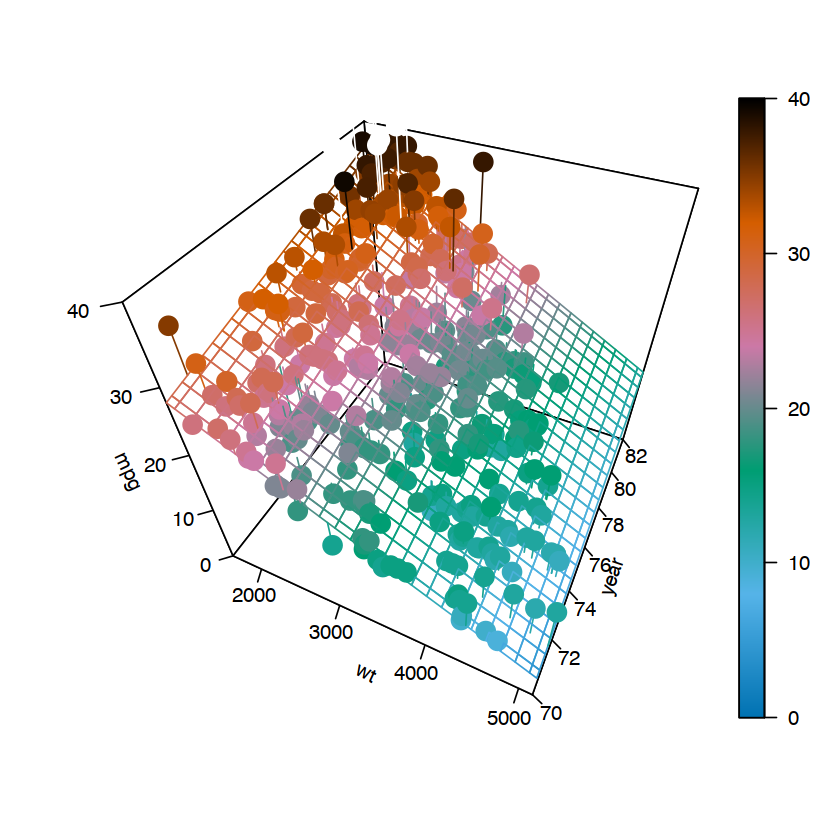

In [2]:
library("plot3D")
x = autompg$wt
y = autompg$year
z = autompg$mpg
fit <- lm(z ~ x + y)
grid.lines = 25
x.pred     = seq(min(x), max(x), length.out = grid.lines)
y.pred     = seq(min(y), max(y), length.out = grid.lines)
xy         = expand.grid(x = x.pred, y = y.pred)
z.pred = matrix(predict(fit, newdata = xy), 
                nrow = grid.lines, ncol = grid.lines)
fitpoints = predict(fit)
scatter3D(x, y, z, pch = 19, cex = 2, col = gg.col(1000), lighting = TRUE,
          theta = 25, phi = 45, ticktype = "detailed",
          xlab = "wt", ylab = "year", zlab = "mpg", zlim = c(0, 40), clim = c(0, 40),
          surf = list(x = x.pred, y = y.pred, z = z.pred,  
                      facets = NA, fit = fitpoints), main = "")

Here the plane on the plot is the one that is as close as possible to the data points. Now the question is: how to measure *closeness*?

The most common approach is to use the *least squares* criterion, i.e. to minimize the residual sum of squares:

$$
\begin{align*}
\text{RSS}({\beta}^*_1, \ldots, \beta^*_p) &= \sum_{i = 1}^{n}(y_i - \hat{y}_i)^2\\
&= \sum_{i = 1}^{n}(y_i - (\beta^*_1 x_{i1} + \ldots + \beta^*_p x_{ip}))^2\\
&= \sum_{i = 1}^{n}(y_i - \mathbf{x}_i^T \boldsymbol{\beta}^*)^2
\end{align*}
$$
with respect to $\beta_1^*, \ldots, \beta_p^*$. Using matrix notation, we can write

$$
\text{RSS}(\boldsymbol{\beta}^*) = (\mathbf{y} - \mathbf{X}\boldsymbol{\beta}^*)^T(\mathbf{y} - \mathbf{X}\boldsymbol{\beta}^*).
$$

Thus, we define the OLS estimator $\hat{\boldsymbol{\beta}}$ as 

$$
\hat{\boldsymbol{\beta}} := \arg\min_{\boldsymbol{\beta}^* \in \mathbf{R}} \text{RSS}(\boldsymbol{\beta}^*).
$$

And now we solve it:

$$
\begin{align}
\text{RSS}(\boldsymbol{\beta}^*) &= \mathbf{y}^T \mathbf{y} - \big(\mathbf{X}\boldsymbol{\beta}^*\big)^T \mathbf{y} - \mathbf{y}^T \mathbf{X}\boldsymbol{\beta}^* + \big(\mathbf{X}\boldsymbol{\beta}^*\big)^T\big(\mathbf{X}\boldsymbol{\beta}^*\big)\\
& = \mathbf{y}^T \mathbf{y} - 2 {\boldsymbol{\beta}^*}^T \mathbf{X}^T\mathbf{y} + {\boldsymbol{\beta}^*}^T \mathbf{X}^T\mathbf{X}\boldsymbol{\beta}^*.
\end{align}
$$

Thus, 
$$
\begin{align}
\frac{\partial}{\partial\boldsymbol{\beta}^*}\text{RSS}(\boldsymbol{\beta}^*) &= - 2 \mathbf{X}^T\mathbf{y} + 2 \mathbf{X}^T\mathbf{X}\boldsymbol{\beta}^*.
\end{align}
$$

Since $\hat{\boldsymbol{\beta}}$ minimizes the sum of squared residuals, we can write:

$$
\begin{align}
\frac{\partial}{\partial\boldsymbol{\beta}^*}\text{RSS}(\hat{\boldsymbol{\beta}}) &= - 2 \mathbf{X}^T\mathbf{y} + 2 \mathbf{X}^T\mathbf{X}\hat{\boldsymbol{\beta}} = 0\\
\mathbf{X}^T\mathbf{X}\hat{\boldsymbol{\beta}} &= \mathbf{X}^T\mathbf{y}\\
\hat{\boldsymbol{\beta}} &= \big(\mathbf{X}^T\mathbf{X}\big)^{-1}\mathbf{X}^T\mathbf{y}.
\end{align}
$$

Here we implicitly assumed that the matrix $\mathbf{X}^T\mathbf{X}$ is invertible. The formal assumption is stated below.

### Assumption 2: Full rank (or no multicollinearity)

With probability $1$, we have

$$\text{rank}(\mathbf{X}^T\mathbf{X}) = p.$$

**Note:** Beware of the possibility of a potential computational problem: when an arithmetic operation involves both
very large numbers and very small numbers, floating-point calculation can produce inaccurate results. This is relevant in the computation of OLS estimates when the regressors greatly differ in magnitude.

### Assumption 3: Strict exogeneity

$$\mathbb{E} (\epsilon_i | \mathbf{x}_1, \ldots, \mathbf{x}_n) = 0 \quad (i = 1, \ldots, n).$$

Here, the expectation (mean) is conditional on the regressors for all observations. This point may be made more apparent by writing the assumption without using the data matrix as

$$\mathbb{E} (\epsilon_i | \mathbf{X}) = 0 \quad (i = 1, \ldots, n).$$

**Note:** Do not confuse strict exogeneity and zero unconditional mean ($\mathbb{E}(\epsilon_i) = 0$ for all $i$). They are different! Consider a simple example. Suppose we look at a simple linear regression where the only predictor $x_i$ is equal to $1$ if $i$th individual is male, and is equal to $0$ if $i$th individual is female. Suppose that in the population the number of the males and the number of the females are the same, hence, $P(x_i = 0) = P(x_i = 1) = \frac{1}{2}$. Suppose that $\epsilon_i | X_i = 1 \sim N(1, \sigma^2)$ and  $\epsilon_i | X_i = 0 \sim N(-1, \sigma^2)$. Then we will have

$$ \mathbb{E} (\epsilon_i | x_i = 1) = 1 \text{ and } \mathbb{E} (\epsilon_i | x_i = 0) = -1 \quad\Rightarrow\quad \mathbb{E} (\epsilon_i | \mathbf{X}) \neq 0!$$

But using the law of iterated expectations, we have

$$\mathbb{E}(\epsilon_i) = \mathbb{E} (\epsilon_i | x_i = 1) \cdot P(x_i = 1) + \mathbb{E} (\epsilon_i | x_i = 0) \cdot P(x_i = 0) = 1\cdot \frac{1}{2} + (-1) \frac{1}{2} = 0.$$

**Implications of strong exogeneity.**

1. Unconditional mean is equal to zero:

$$ \mathbb{E}(\epsilon_i) = \mathbb{E}(\mathbb{E} (\epsilon_i | \mathbf{X})) = 0. $$

2. Each regressor is orthogonal to the error term for all observations (sometimes called weak exogeneity):

$$\mathbb{E}(x_{jk}\epsilon_i) = 0 \quad (i, j = 1, \ldots, n;\, k = 1, \ldots, p).$$

Proof:

$$\begin{aligned}
\mathbb{E}(x_{jk}\epsilon_i) &= \mathbb{E}[\mathbb{E} (x_{jk}\epsilon_i | x_{jk})] = \mathbb{E}(x_{jk}\mathbb{E} (\epsilon_i | x_{jk})) = 0 \text{ since }\\
\mathbb{E}(\epsilon_i | x_{jk}) & =\mathbb{E}[\mathbb{E}(\epsilon_i | \mathbf{X})| x_{jk}] = 0,
\end{aligned}$$

where the last line holds because $x_{jk}$ is contained in $\mathbf{X}$.

3. Each regressor and each error term are uncorrelated:

$$ Cov(\epsilon_i , x_{jk}) = 0\quad (i, j = 1, \ldots, n;\, k = 1, \ldots, p).$$

This is a direct implication of 1. and 2.:

$$\begin{aligned}
 Cov(\epsilon_i , x_{jk}) &= \mathbb{E}(x_{jk}\epsilon_i) - \mathbb{E}(x_{jk}) \mathbb{E}(\epsilon_i) \quad \text{ (by definition of covariance) }\\
 &= \mathbb{E}(x_{jk}\epsilon_i) \quad \text{ (since } \mathbb{E}(\epsilon_i) = 0)\\
 & = 0 \quad \text{ (by the orthogonality conditions). }
 \end{aligned}
 $$
 
In particular, for $i = j$, $Cov (x_{ik} \epsilon_i) =  0$. Therefore, strict exogeneity implies the requirement (familiar to those who have studied econometrics before) that the regressors be contemporaneously uncorrelated with the error term.

### Assumption 4: Spherical error variance

Homoskedasticity:

$$\mathbb{E}(\epsilon_i^2 | \mathbf{X}) = \sigma^2 > 0, \quad i = 1, \ldots, n;$$

and no correlation between observations:

$$\mathbb{E}(\epsilon_i \epsilon_j | \mathbf{X}) = 0, \quad i, j = 1, \ldots, n, i \neq j.$$

The homoskedasticity assumption says that the conditional second moment of the error term, which in general is a nonlinear function of X, is a constant.


Since the $(i, j)$ element of the $n \times n$ matrix $\boldsymbol{\epsilon} \boldsymbol{\epsilon}^T$ is $\epsilon_i\epsilon_j$. assumption 4 can be written compactly as

$$\mathbb{E}(\boldsymbol{\epsilon} \boldsymbol{\epsilon}^T | \mathbf{X}) =  \sigma^2 \mathbb{I}_n,$$

or, equivalently,

$$Var(\boldsymbol{\epsilon} | \mathbf{X}) = \sigma^2 \mathbb{I}_n.$$

Now we come back to the car dataset. There are two way to get the OLS estimates: manually and by an `R` function `lm()`. First, we start with a built-in function:

In [3]:
mpg_model = lm(mpg ~ wt + year, data = autompg)
coef(mpg_model)

(Intercept)            wt          year 
-14.637641945  -0.006634876   0.761401955

The formula inside `mpg ~ wt + year` reads: "model the response variable `mpg` as a linear function of `wt` and `year`". That is, it will estimate an intercept, as well as slope coefficients for `wt` and `year`. We then extract these using `coef()`.

To verify that this is what `R` has done for us in the case of two predictors, we create an $\mathbf{X}$ matrix. Note that the first column is all 1s, and the remaining columns contain the data.

In [4]:
n = nrow(autompg)
p = length(coef(mpg_model))
X = cbind(rep(1, n), autompg$wt, autompg$year)
y = autompg$mpg
beta_hat = solve(t(X) %*% X) %*% t(X) %*% y
beta_hat

-14.637641945
-0.006634876
0.761401955


Here, $\hat{\beta}_1 = -14.637641945$ is our estimate for $\beta_0$, the mean miles per gallon for a car that weighs $0$ pounds and was built in 1900. We see our estimate here is negative, which is a physical impossibility. However, this isn't unexpected, as we shouldn't expect our model to be accurate for cars from 1900 which weigh 0 pounds. (Because they never existed!) 

The interpretation of the coefficients in front of our predictors is as follos. For example $\hat{\beta}_2 = -0.006634876$ is our estimate for $\beta_2$, the average change in miles per gallon for an increase in weight ($\mathbf{x}_{2}$) of one-pound **for a car of a certain model year**, that is, for a fixed value of $\mathbf{x}_{3}$. Note that this coefficient is actually the same for any given value of $\mathbf{x}_{3}$. Later, we will look at models that allow for a different change in mean response for different values of $\mathbf{x}_{3}$. Also note that this estimate is negative, which we would expect since, in general, fuel efficiency decreases for larger vehicles. Recall that in the multiple linear regression setting, this interpretation is dependent on a fixed value for $\mathbf{x}_{3}$, that is, "for a car of a certain model year." It is possible that the indirect relationship between fuel efficiency and weight does not hold when an additional factor, say year, is included, and thus we could have the sign of our coefficient flipped.

Lastly, $\hat{\beta}_3 = 0.761401955$ is our estimate for $\beta_3$, the average change in miles per gallon for a one-year increase in model year ($\mathbf{x}_{3}$) for a car of a certain weight, that is, for a fixed value of $\mathbf{x}_{2}$. It is not surprising that the estimate is positive. We expect that as time passes and the years march on, technology would improve so that a car of a specific weight would get better mileage now as compared to their predecessors. And yet, the coefficient could have been negative because we are also including weight as variable.

## How to assess the quality of the fit?

In this section, we will be interested in the following quantities:

1. OLS fitted values, $\hat{y}_i = \mathbf{x}^T_i \hat{\boldsymbol{\beta}} = \hat{\rho}(\mathbf{x}_i)$.

2. OLS residuals, $\hat{\epsilon}_i = y_i - \hat{y}_i$.

3. Mean squared error, $$\text{MSE} = \frac{1}{n}\sum_{i = 1}^n \big(y_i-\hat{\rho}(\mathbf{x}_i)\big)^2.$$

### Which $\hat{\rho}(\mathbf{x}_i)$ will minimize MSE?

Note that $\text{MSE} \geq 0$ always. Also note that setting $\hat{\rho}(\mathbf{x}_i) = y_i$ will give you the minimal value of $\text{MSE} = 0$.

But will it be useful in any way?

(Intercept)           x 
   1.848465    2.722331

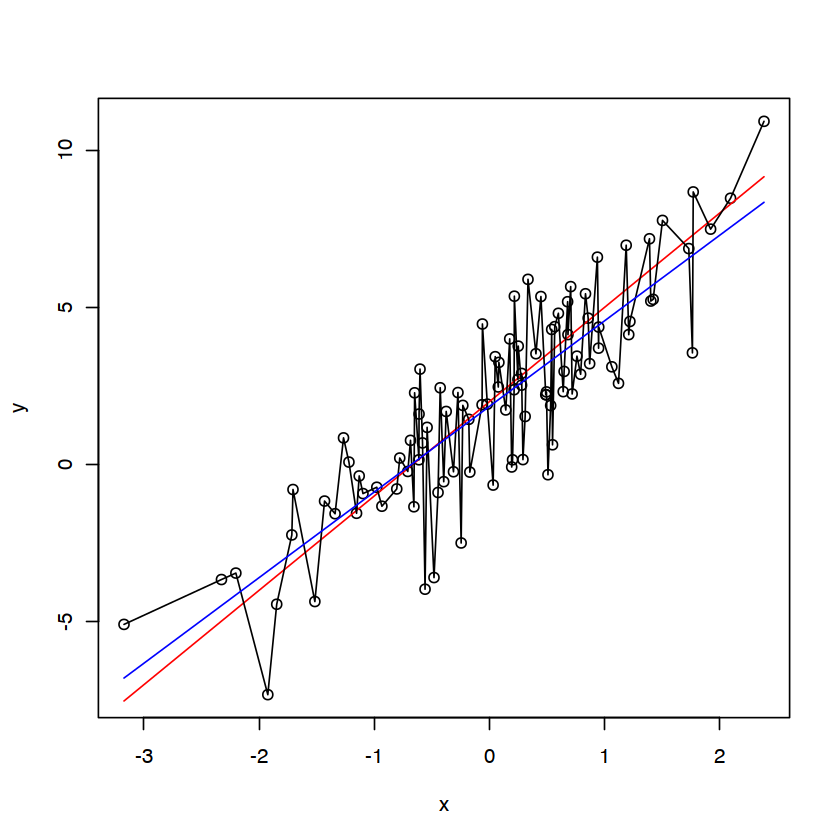

In [2]:
x   <- sort(rnorm(100))
eps <- rnorm(100, mean = 0, sd = 2)
y <- 2 + 3 * x + eps
plot(x, y)
lines(x, 2 + 3 * x, col = "red")
lines(x, y, type = "l")
model <- lm(y ~ x)
coef(model)
lines(x, coef(model)[1] + coef(model)[2] * x, col = "blue")

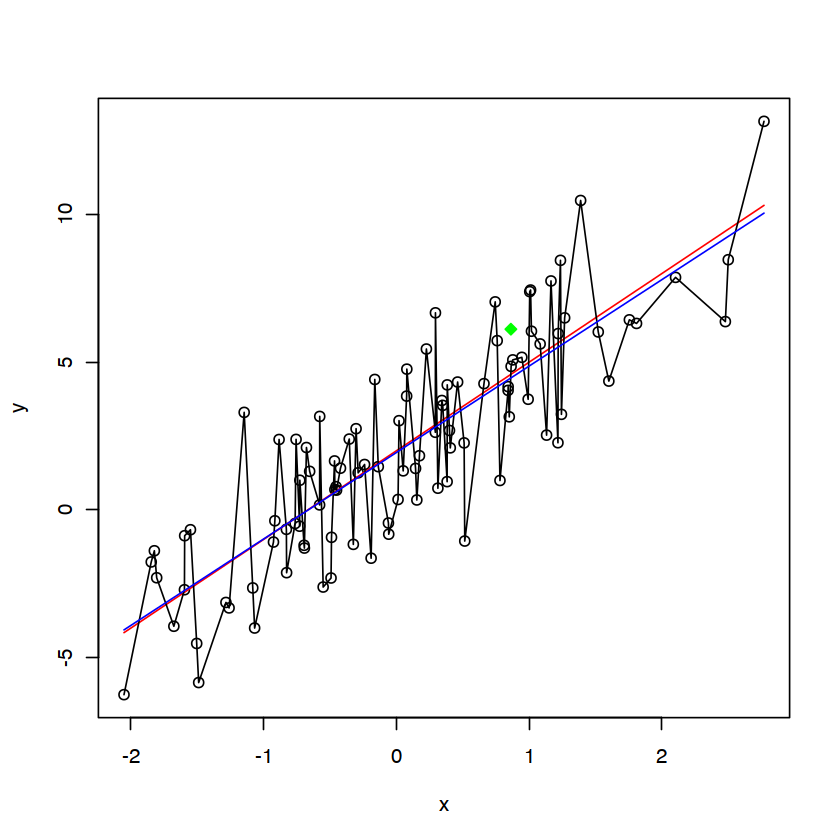

In [31]:
plot(x, y)
lines(x, 2 + 3 * x, col = "red")
lines(x, y, type = "l")
lines(x, coef(model)[1] + coef(model)[2] * x, col = "blue")
x_new   <- rnorm(1)
eps_new <- rnorm(1)
y_new   <- 2 + 3 * x_new + eps_new
points(x_new, y_new, pch = 23, col = "green", bg = "green")

Researchers are mostly interested in two questions.

1. What is the structural relationship between $Y$ and $X$?

2. How to predict $y$ on the basis of a new $x$?

*These questions are related, but not the same!* But for both questions $\text{MSE}$ is not the best measure of success.

To answer 1., we will introduce some measures of fit later on.

What can we do about 2.? One of the options would be to choose $\hat{\rho}(\mathbf{x})$ that gives the lowest $\text{MSE}$ on another dataset (usually called a test dataset). So the problem would be 

$$\text{minimize }\quad \frac{1}{n}\sum_{i = 1}^n \big(y_i^\prime-\hat{\rho}(\mathbf{x}^\prime_i)\big)^2 \text{ where } \hat{\rho}(\cdot) \text{ was obtained on the basis of } (\mathbf{y}, \mathbf{X}).$$

But where to get this new dataset? Either (a) we can get some new data (almost impossible); or (b) we use resampling methods such as cross-validation.

### Fit of the OLS estimator

Having derived the OLS estimator of the coefficient vector, we can define a few related concepts.

- The vector of the OLS residuals, $\hat{\boldsymbol{\epsilon}} = (\hat{\epsilon}_1, \ldots, \hat{\epsilon}_n)$.

- The vector of the fitted values, $\hat{\mathbf{y}} = \mathbf{X}\hat{\boldsymbol{\beta}}$.

- The residual sum of squares, $\text{RSS} = \hat{\boldsymbol{\epsilon}}^T \hat{\boldsymbol{\epsilon}} = (\mathbf{y} - \hat{\mathbf{y}})^T (\mathbf{y} - \hat{\mathbf{y}})$.


- The OLS estimate of $\sigma^2$ (the variance of the error term), denoted $s^2$, is the sum of squared residuals divided by $n - p$:

$$s^2 = \frac{\text{RSS}}{n - p} = \frac{(\mathbf{y} - \hat{\mathbf{y}})^T (\mathbf{y} - \hat{\mathbf{y}})}{n - p}.$$

Dividing the residual sum of squares by $n − p$ (called the degrees of freedom) rather than by $n$ (the sample size) makes this estimate unbiased for $\sigma^2$. The intuitive reason is that $p$ parameters $\boldsymbol{\beta}$ have to be estimated before obtaining the residual vector $\hat{\boldsymbol{\epsilon}}$ used to calculate $s^2$.

- The square root of $s^2$, $s$, is called the residual standard error. It is an estimate of the standard
deviation of the error term:

$$\text{RSE} = \sqrt{\frac{\text{RSS}}{n - p}} = \sqrt{\frac{(\mathbf{y} - \hat{\mathbf{y}})^T (\mathbf{y} - \hat{\mathbf{y}})}{n- p}}.$$

Roughly speaking, it is the average amount that the response will deviate from the true regression line.

- The sampling error is defined as $\hat{\boldsymbol{\beta}}- \boldsymbol{\beta}$. It too can be related to $\boldsymbol{\epsilon}$ as follows.

$$
\begin{aligned}
\hat{\boldsymbol{\beta}} − \boldsymbol{\beta} &= \big(\mathbf{X}^T\mathbf{X}\big)^{-1}\mathbf{X}^T\mathbf{y} - \boldsymbol{\beta} \\
&= \big(\mathbf{X}^T\mathbf{X}\big)^{-1}\mathbf{X}^T \big(\mathbf{X}\boldsymbol{\beta} + \boldsymbol{\epsilon}\big) - \boldsymbol{\beta}\\
&= \big(\mathbf{X}^T\mathbf{X}\big)^{-1}\mathbf{X}^T \mathbf{X}\boldsymbol{\beta} + \big(\mathbf{X}^T\mathbf{X}\big)^{-1}\mathbf{X}^T \boldsymbol{\epsilon}\big) - \boldsymbol{\beta}\\
&= \boldsymbol{\beta} + \big(\mathbf{X}^T\mathbf{X}\big)^{-1}\mathbf{X}^T \boldsymbol{\epsilon} - \boldsymbol{\beta}\\
&= \big(\mathbf{X}^T\mathbf{X}\big)^{-1}\mathbf{X}^T \boldsymbol{\epsilon}.
\end{aligned}
$$

In `R`, we could directly access $\text{RSE}$ for a fitted model.

In [5]:
summary(mpg_model)$sigma

[1] 3.431367

And we can now verify that our math above is indeed calculating the same quantity:

$$\text{RSE} = \sqrt{\frac{(\mathbf{y} - \hat{\mathbf{y}})^T (\mathbf{y} - \hat{\mathbf{y}})}{n- p}} \quad \text{ where } \quad\hat{\mathbf{y}} = \mathbf{X} \hat{\mathbf{\beta}}.$$

In [6]:
y_hat <- X %*% solve(t(X) %*% X) %*% t(X) %*% y
e     <- y - y_hat
sqrt(t(e) %*% e / (n - p))
sqrt(sum((y - y_hat) ^ 2) / (n - p))

3.431367


[1] 3.431367

The $\text{RSE}$ is considered a measure of the *lack of fit* of the model to the data. But since $\text{RSE}$ it is measured in the units of $Y$, it is not always clear what consitutes a good $\text{RSE}$. $R^2$ statistic, on the other hand, provides an alternative, relative, measure of fit. It takes the form of a proportion of variance explained and it always takes on a value between $0$ and $1$.

$$R^2 = \frac{\text{TSS} - \text{RSS}}{\text{TSS}} = 1 - \frac{\text{RSS}}{\text{TSS}},$$

where $\text{TSS} = \sum_{i=1}^n (y_i - \bar{y})^2$ is the total sum of squares. $\text{TSS}$ measures the total variance in the response $Y$.

`R` calculates this measure of fit automatically.

In [7]:
summary(mpg_model)$r.squared

[1] 0.8082355

But as before, we will calculate it by hand to compare.

In [10]:
TSS <- t(y - mean(y)) %*% (y - mean(y))
RSS <- t(e) %*% e 
R.sq <- (TSS - RSS)/TSS
R.sq

0.8082355


We say that $81\%$ for the observed variation in miles per gallon is explained by the linear relationship with the two predictor variables, weight and year.

**Note:** In case of a single predictor, we can correlation between the outcome and the predictor as another measure of the linear relationship between these random variables. Can we do that in case of multiple regressors as well? Unfortunately, no. The reason is that the concept of correlation between the predictors and the outcome does not extend automatically to the case of many regressors. $R^2$ fills this position for MLR.